In [ ]:
#Downloading S&P 500 price data
import yfinance as yf

sp500 = yf.Ticker("^GSPC")

sp500 = sp500.history(period="max")

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,0.0,0.0
2024-01-09 00:00:00-05:00,4741.930176,4765.470215,4730.350098,4756.500000,3529960000,0.0,0.0
2024-01-10 00:00:00-05:00,4759.939941,4790.799805,4756.200195,4783.450195,3498680000,0.0,0.0


In [ ]:
sp500.index

In [ ]:
#cleaning and visualizing our stock market data

del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
#setting up our target for ML
sp500["Tomorrow"] = sp500["Close"].shift(-1) #shift one day back

sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,4756.500000
2024-01-09 00:00:00-05:00,4741.930176,4765.470215,4730.350098,4756.500000,3529960000,4783.450195
2024-01-10 00:00:00-05:00,4759.939941,4790.799805,4756.200195,4783.450195,3498680000,4780.240234


In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,4756.500000,0
2024-01-09 00:00:00-05:00,4741.930176,4765.470215,4730.350098,4756.500000,3529960000,4783.450195,1
2024-01-10 00:00:00-05:00,4759.939941,4790.799805,4756.200195,4783.450195,3498680000,4780.240234,0


In [ ]:
sp500 = sp500.loc["1990-01-01 00:00:00-05:00":].copy() #specify the starting date for prediction

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,4756.500000,0
2024-01-09 00:00:00-05:00,4741.930176,4765.470215,4730.350098,4756.500000,3529960000,4783.450195,1
2024-01-10 00:00:00-05:00,4759.939941,4790.799805,4756.200195,4783.450195,3498680000,4780.240234,0


In [ ]:
#training an initial ML model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors]) #to verify if our prdictions are correct or not

import pandas as pd
preds = pd.Series(preds, index = test.index)

precision_score(test["Target"], preds)

0.5531914893617021

<Axes: xlabel='Date'>

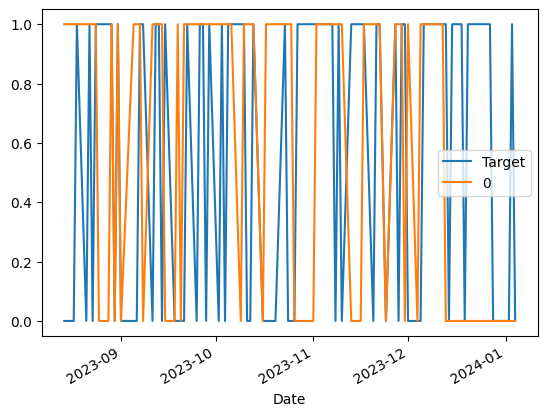

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [ ]:
#bulding a backtesting system
#Wraping up everything in one function
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy() #prior to the current year
    test = data.iloc[i:(i+step)].copy() #current year
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

predictions = backtest(sp500, model, predictors)

predictions["predictions"].value_counts()

0    3472
1    2596
Name: predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["predictions"])

0.5288906009244992

In [ ]:
#adding additional predictors to our model

horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_average = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1,1.000715,2.0,1.006392,4.0,1.072714,38.0,1.118166,137.0,1.204993,530.0
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078,0,1.000185,2.0,1.003175,5.0,1.070893,39.0,1.117603,137.0,1.204974,530.0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,4742.830078,0,0.998585,1.0,0.999372,4.0,1.065854,38.0,1.113476,137.0,1.201116,529.0


In [ ]:
#improving our model

model = RandomForestClassifier(n_estimators=2500, min_samples_split=50, random_state=1)
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

predictions = backtest(sp500, model, new_predictors)

predictions["predictions"].value_counts()

1    3595
0    1472
Name: predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["predictions"])

0.552990264255911